# Cancer Probabilities Exploratory Data Analysis
Date: October 06, 2024

By Muhammad Hassan Saboor

Data Analyst | ML & Deep Learning Enthusiast

Student of Masters in Data Science @ FAST NUCES (LAHORE)

**Variables:**

Sr No.: A unique identifier for each observation.

Smoking Habit: Categorizes individuals based on their smoking frequency (e.g., Heavy, Moderate, Occasional, None).

Drinking Habit: Categorizes individuals based on their alcohol consumption frequency (e.g., Frequent, Occasional, None).

Biking Habit: Measures the frequency of biking activity (e.g., High, Medium, Low).

Walking Habit: Measures the frequency of walking activity (e.g., High, Medium, Low).

Jogging Habit: Measures the frequency of jogging activity (e.g., High, Medium, Low).

Probability of Cancer: A numerical value representing the estimated likelihood of developing cancer, ranging from 0 to 1.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Basic Importing Settings

In [2]:
warnings.filterwarnings("ignore")

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/cancer-probabilities/cancer-probabilities.csv")

# Exploring the Data

In [4]:
df.head()

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,Heavy,Frequent,Low,Low,Low,0.8
1,2,Occasional,Moderate,High,High,High,0.2
2,3,NaN,NaN,High,High,High,0.1
3,4,Heavy,Frequent,Low,Low,Low,0.9
4,5,Moderate,Occasional,Medium,Medium,Medium,0.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr No.                 50 non-null     int64  
 1   Smoking Habit          34 non-null     object 
 2   Drinking Habit         34 non-null     object 
 3   Biking Habit           50 non-null     object 
 4   Walking Habit          50 non-null     object 
 5   Jogging Habit          50 non-null     object 
 6   Probability of Cancer  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [6]:
df['Smoking Habit'].value_counts()

Smoking Habit
Heavy         17
Moderate      16
Occasional     1
Name: count, dtype: int64

In [7]:
df['Drinking Habit'].value_counts()

Drinking Habit
Frequent      17
Occasional    16
Moderate       1
Name: count, dtype: int64

In [8]:
df['Biking Habit'].value_counts()

Biking Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

In [9]:
df['Walking Habit'].value_counts()

Walking Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

In [10]:
df['Jogging Habit'].value_counts()

Jogging Habit
Low       17
High      17
Medium    16
Name: count, dtype: int64

# Data Cleaning

### Handling Null Values

In [11]:
df.isnull().sum()

Sr No.                    0
Smoking Habit            16
Drinking Habit           16
Biking Habit              0
Walking Habit             0
Jogging Habit             0
Probability of Cancer     0
dtype: int64

### Random Imputation Based on Distribution

In [12]:
# Define the distribution for Smoking Habit
smoking_probs = df['Smoking Habit'].value_counts(normalize=True)
df['Smoking Habit'].fillna(np.random.choice(smoking_probs.index, p=smoking_probs.values), inplace=True)

# Define the distribution for Drinking Habit
drinking_probs = df['Drinking Habit'].value_counts(normalize=True)
df['Drinking Habit'].fillna(np.random.choice(drinking_probs.index, p=drinking_probs.values), inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr No.                 50 non-null     int64  
 1   Smoking Habit          50 non-null     object 
 2   Drinking Habit         50 non-null     object 
 3   Biking Habit           50 non-null     object 
 4   Walking Habit          50 non-null     object 
 5   Jogging Habit          50 non-null     object 
 6   Probability of Cancer  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


### Converting the Probibilities into bins

In [14]:
# Define the bin edges and labels
bin_edges = [0, 0.3, 0.7, 1]  # Bins for low, medium, high
bin_labels = ['Low', 'Medium', 'High']

# Create a new column with binned data
df['Cancer Risk Category'] = pd.cut(df['Probability of Cancer'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [15]:
df['Cancer Risk Category'].value_counts()

Cancer Risk Category
Low       21
High      15
Medium    14
Name: count, dtype: int64

In [16]:
df.head()

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer,Cancer Risk Category
0,1,Heavy,Frequent,Low,Low,Low,0.8,High
1,2,Occasional,Moderate,High,High,High,0.2,Low
2,3,Heavy,Frequent,High,High,High,0.1,Low
3,4,Heavy,Frequent,Low,Low,Low,0.9,High
4,5,Moderate,Occasional,Medium,Medium,Medium,0.4,Medium


A new column named **Cancer Risk Category** has been added in the dataset.

# Exploratory Data Analysis

## Distribution of Cancer by Smoking

In [17]:
Cancer_by_Smoking = df.groupby(['Smoking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [18]:
Cancer_by_Smoking

,Smoking Habit,Cancer Risk Category,Count
0,Heavy,Low,16
1,Heavy,Medium,2
2,Heavy,High,15
3,Moderate,Low,4
4,Moderate,Medium,12
5,Moderate,High,0
6,Occasional,Low,1
7,Occasional,Medium,0
8,Occasional,High,0


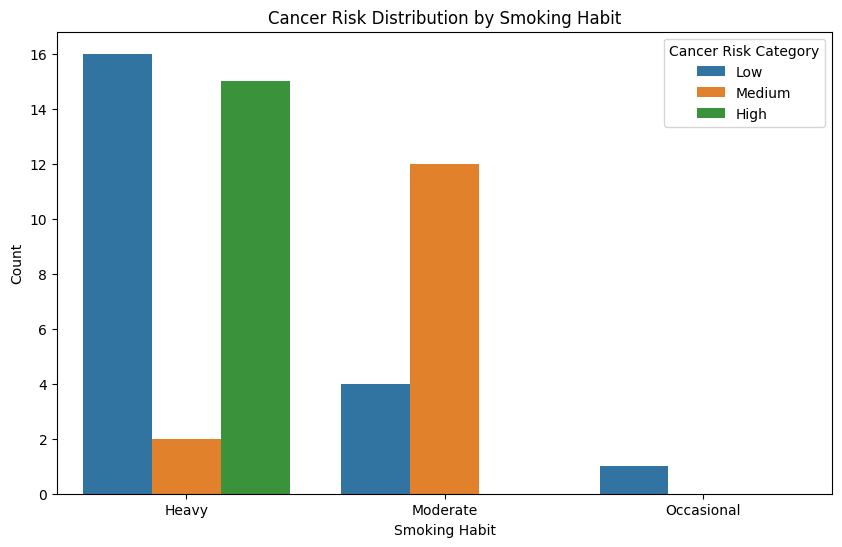

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Smoking Habit', y='Count', hue='Cancer Risk Category', data=Cancer_by_Smoking)

plt.xlabel('Smoking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Smoking Habit')
plt.legend(title='Cancer Risk Category')
plt.show()

## Distribution of Cancer by Drinking

In [20]:
Cancer_by_Drinking = df.groupby(['Drinking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [21]:
Cancer_by_Drinking

,Drinking Habit,Cancer Risk Category,Count
0,Frequent,Low,16
1,Frequent,Medium,2
2,Frequent,High,15
3,Moderate,Low,1
4,Moderate,Medium,0
5,Moderate,High,0
6,Occasional,Low,4
7,Occasional,Medium,12
8,Occasional,High,0


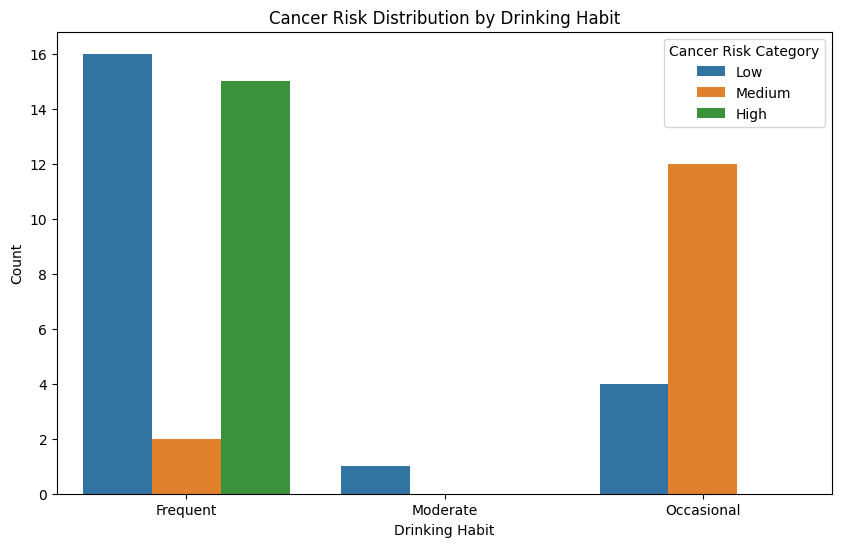

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Drinking Habit', y='Count', hue='Cancer Risk Category', data=Cancer_by_Drinking)

plt.xlabel('Drinking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Drinking Habit')
plt.legend(title='Cancer Risk Category')
plt.show()

## Distribution of Cancer by Biking

In [23]:
Cancer_by_Biking = df.groupby(['Biking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [24]:
Cancer_by_Biking

,Biking Habit,Cancer Risk Category,Count
0,High,Low,17
1,High,Medium,0
2,High,High,0
3,Low,Low,0
4,Low,Medium,2
5,Low,High,15
6,Medium,Low,4
7,Medium,Medium,12
8,Medium,High,0


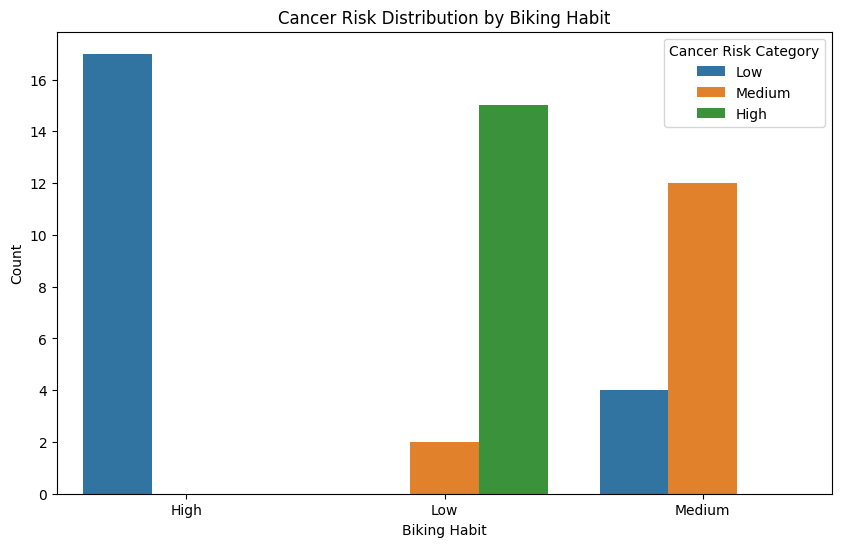

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Biking Habit', y='Count', hue='Cancer Risk Category', data=Cancer_by_Biking)

plt.xlabel('Biking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Biking Habit')
plt.legend(title='Cancer Risk Category')
plt.show()

## Distribution of Cancer by Walking

In [26]:
Cancer_by_Walking = df.groupby(['Walking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [27]:
Cancer_by_Walking

,Walking Habit,Cancer Risk Category,Count
0,High,Low,17
1,High,Medium,0
2,High,High,0
3,Low,Low,0
4,Low,Medium,2
5,Low,High,15
6,Medium,Low,4
7,Medium,Medium,12
8,Medium,High,0


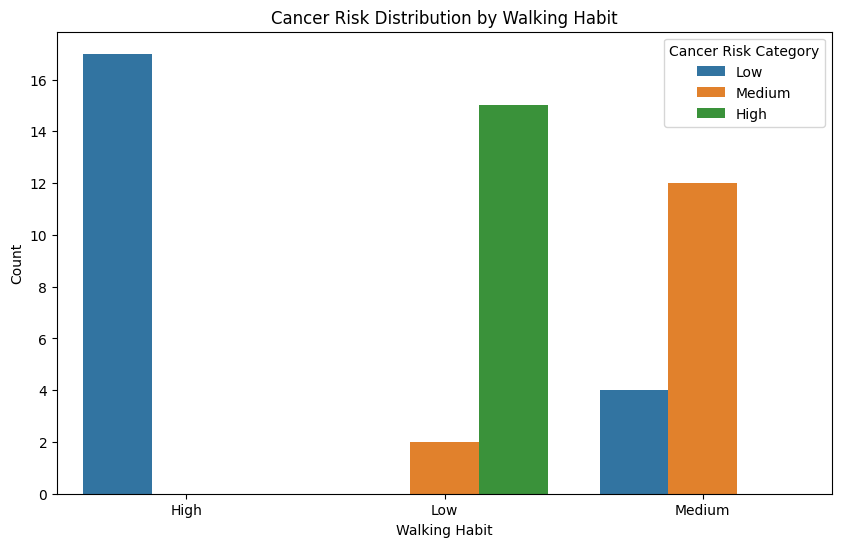

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Walking Habit', y='Count', hue='Cancer Risk Category', data=Cancer_by_Walking)

plt.xlabel('Walking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Walking Habit')
plt.legend(title='Cancer Risk Category')
plt.show()

## Distribution of Cancer by Jogging

In [29]:
Cancer_by_Jogging = df.groupby(['Jogging Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [30]:
Cancer_by_Jogging

,Jogging Habit,Cancer Risk Category,Count
0,High,Low,17
1,High,Medium,0
2,High,High,0
3,Low,Low,0
4,Low,Medium,2
5,Low,High,15
6,Medium,Low,4
7,Medium,Medium,12
8,Medium,High,0


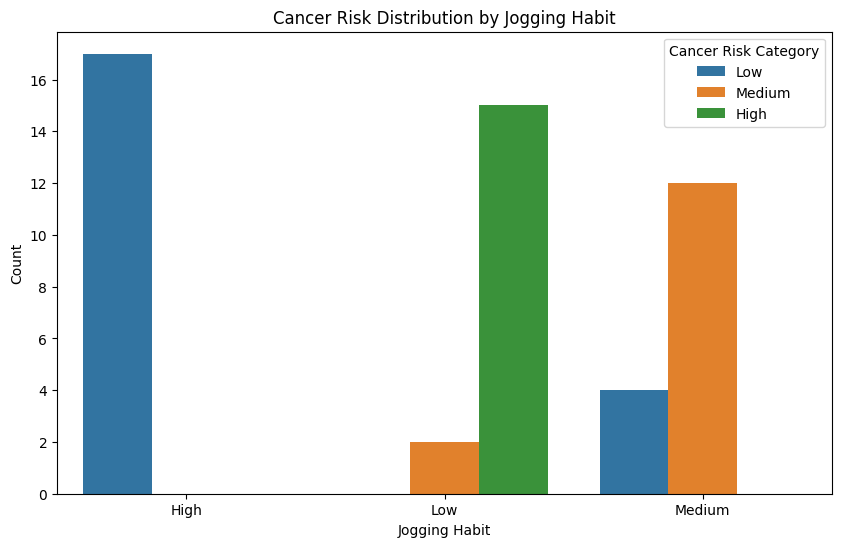

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Jogging Habit', y='Count', hue='Cancer Risk Category', data=Cancer_by_Jogging)

plt.xlabel('Jogging Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Jogging Habit')
plt.legend(title='Cancer Risk Category')
plt.show()

## Distribution of Cancer by Smoking and Drinking

In [32]:
Cancer_by_Smoking_and_Drinking = df.groupby(['Smoking Habit', 'Drinking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [33]:
Cancer_by_Smoking_and_Drinking

,Smoking Habit,Drinking Habit,Cancer Risk Category,Count
0,Heavy,Frequent,Low,16
1,Heavy,Frequent,Medium,2
2,Heavy,Frequent,High,15
3,Heavy,Moderate,Low,0
4,Heavy,Moderate,Medium,0
5,Heavy,Moderate,High,0
6,Heavy,Occasional,Low,0
7,Heavy,Occasional,Medium,0
8,Heavy,Occasional,High,0
9,Moderate,Frequent,Low,0


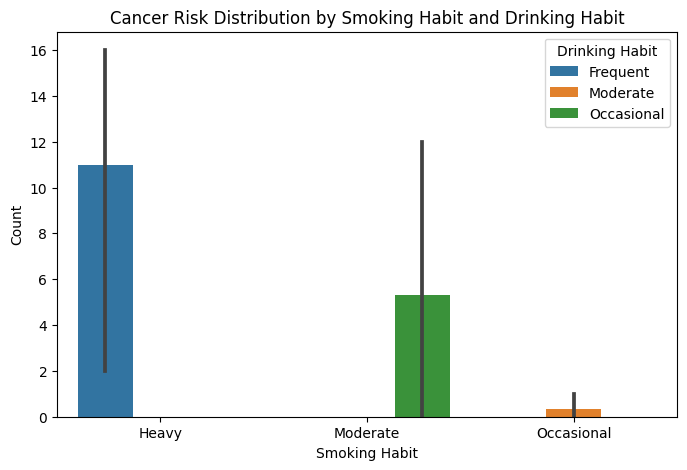

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Smoking Habit', y='Count', hue='Drinking Habit', data=Cancer_by_Smoking_and_Drinking)

plt.xlabel('Smoking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Smoking Habit and Drinking Habit')
plt.legend(title='Drinking Habit')
plt.show()

## Distribution of Cancer by Smoking and Biking

In [35]:
Cancer_by_Smoking_and_Biking = df.groupby(['Smoking Habit', 'Biking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [36]:
Cancer_by_Smoking_and_Biking

,Smoking Habit,Biking Habit,Cancer Risk Category,Count
0,Heavy,High,Low,16
1,Heavy,High,Medium,0
2,Heavy,High,High,0
3,Heavy,Low,Low,0
4,Heavy,Low,Medium,2
5,Heavy,Low,High,15
6,Heavy,Medium,Low,0
7,Heavy,Medium,Medium,0
8,Heavy,Medium,High,0
9,Moderate,High,Low,0


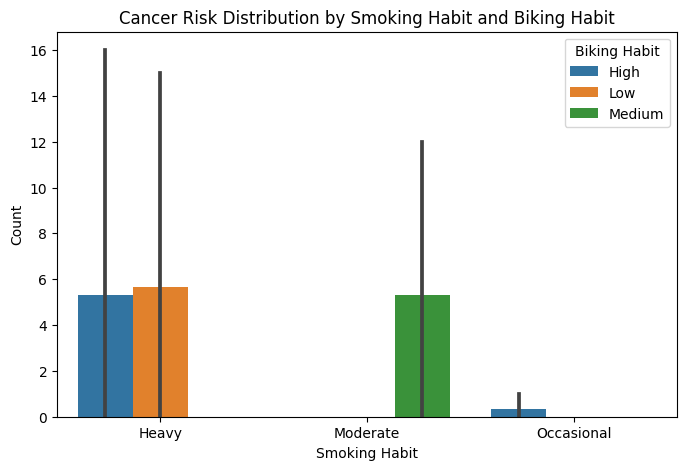

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Smoking Habit', y='Count', hue='Biking Habit', data=Cancer_by_Smoking_and_Biking)

plt.xlabel('Smoking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Smoking Habit and Biking Habit')
plt.legend(title='Biking Habit')
plt.show()

## Distribution of Cancer by Smoking and Walking

In [38]:
Cancer_by_Smoking_and_Walking = df.groupby(['Smoking Habit', 'Walking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [39]:
Cancer_by_Smoking_and_Walking

,Smoking Habit,Walking Habit,Cancer Risk Category,Count
0,Heavy,High,Low,16
1,Heavy,High,Medium,0
2,Heavy,High,High,0
3,Heavy,Low,Low,0
4,Heavy,Low,Medium,2
5,Heavy,Low,High,15
6,Heavy,Medium,Low,0
7,Heavy,Medium,Medium,0
8,Heavy,Medium,High,0
9,Moderate,High,Low,0


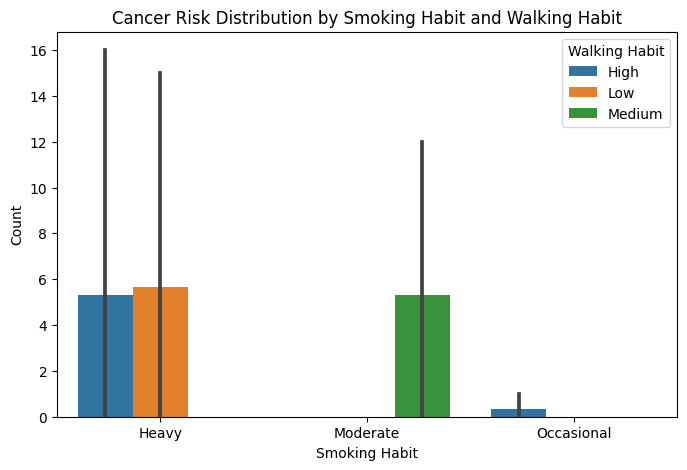

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Smoking Habit', y='Count', hue='Walking Habit', data=Cancer_by_Smoking_and_Walking)

plt.xlabel('Smoking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Smoking Habit and Walking Habit')
plt.legend(title='Walking Habit')
plt.show()

## Distribution of Cancer by Smoking and Jogging

In [41]:
Cancer_by_Smoking_and_Jogging = df.groupby(['Smoking Habit', 'Jogging Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [42]:
Cancer_by_Smoking_and_Jogging

,Smoking Habit,Jogging Habit,Cancer Risk Category,Count
0,Heavy,High,Low,16
1,Heavy,High,Medium,0
2,Heavy,High,High,0
3,Heavy,Low,Low,0
4,Heavy,Low,Medium,2
5,Heavy,Low,High,15
6,Heavy,Medium,Low,0
7,Heavy,Medium,Medium,0
8,Heavy,Medium,High,0
9,Moderate,High,Low,0


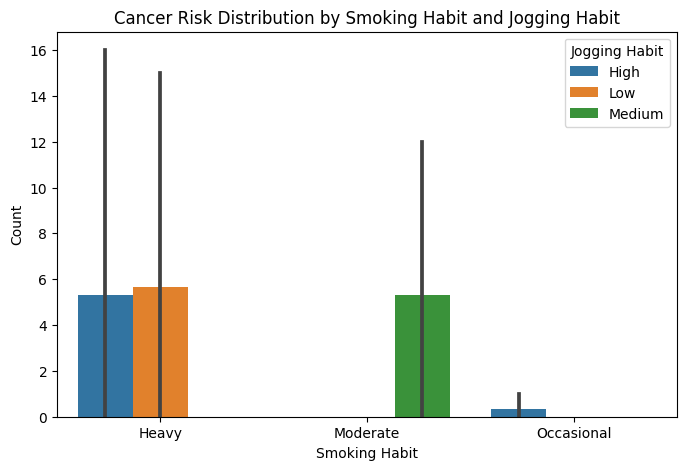

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Smoking Habit', y='Count', hue='Jogging Habit', data=Cancer_by_Smoking_and_Jogging)

plt.xlabel('Smoking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Smoking Habit and Jogging Habit')
plt.legend(title='Jogging Habit')
plt.show()

## Distribution of Cancer by Drinking and Biking

In [44]:
Cancer_by_Drinking_and_Biking = df.groupby(['Drinking Habit', 'Biking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [45]:
Cancer_by_Drinking_and_Biking

,Drinking Habit,Biking Habit,Cancer Risk Category,Count
0,Frequent,High,Low,16
1,Frequent,High,Medium,0
2,Frequent,High,High,0
3,Frequent,Low,Low,0
4,Frequent,Low,Medium,2
5,Frequent,Low,High,15
6,Frequent,Medium,Low,0
7,Frequent,Medium,Medium,0
8,Frequent,Medium,High,0
9,Moderate,High,Low,1


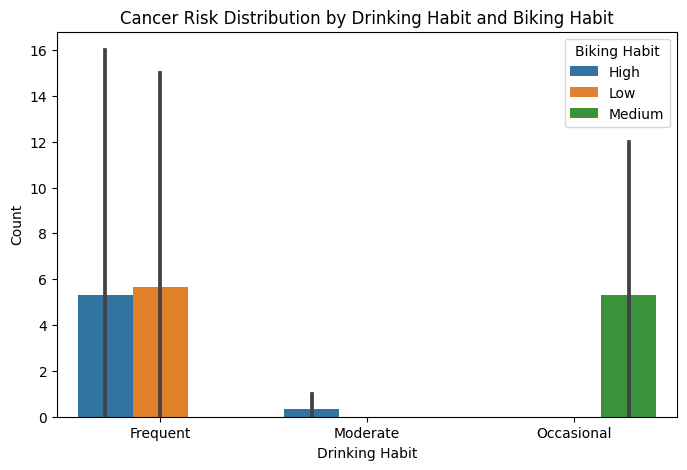

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Drinking Habit', y='Count', hue='Biking Habit', data=Cancer_by_Drinking_and_Biking)

plt.xlabel('Drinking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Drinking Habit and Biking Habit')
plt.legend(title='Biking Habit')
plt.show()

## Distribution of Cancer by Drinking and Walking

In [47]:
Cancer_by_Drinking_and_Walking = df.groupby(['Drinking Habit', 'Walking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [48]:
Cancer_by_Drinking_and_Walking

,Drinking Habit,Walking Habit,Cancer Risk Category,Count
0,Frequent,High,Low,16
1,Frequent,High,Medium,0
2,Frequent,High,High,0
3,Frequent,Low,Low,0
4,Frequent,Low,Medium,2
5,Frequent,Low,High,15
6,Frequent,Medium,Low,0
7,Frequent,Medium,Medium,0
8,Frequent,Medium,High,0
9,Moderate,High,Low,1


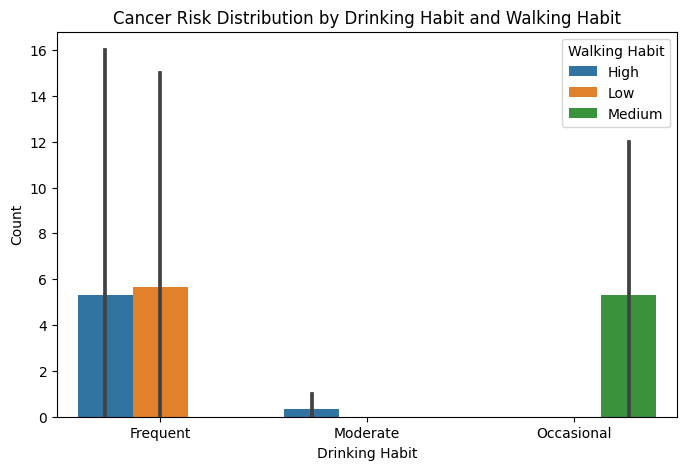

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Drinking Habit', y='Count', hue='Walking Habit', data=Cancer_by_Drinking_and_Walking)

plt.xlabel('Drinking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Drinking Habit and Walking Habit')
plt.legend(title='Walking Habit')
plt.show()

## Distribution of Cancer by Drinking and Jogging

In [50]:
Cancer_by_Drinking_and_Jogging = df.groupby(['Drinking Habit', 'Jogging Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [51]:
Cancer_by_Drinking_and_Jogging

,Drinking Habit,Jogging Habit,Cancer Risk Category,Count
0,Frequent,High,Low,16
1,Frequent,High,Medium,0
2,Frequent,High,High,0
3,Frequent,Low,Low,0
4,Frequent,Low,Medium,2
5,Frequent,Low,High,15
6,Frequent,Medium,Low,0
7,Frequent,Medium,Medium,0
8,Frequent,Medium,High,0
9,Moderate,High,Low,1


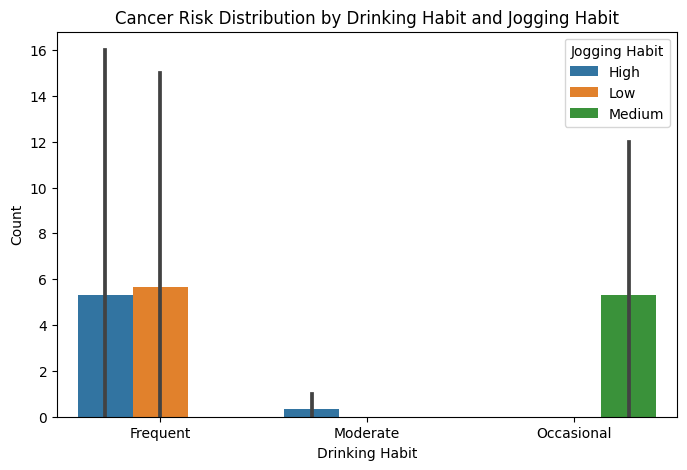

In [52]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Drinking Habit', y='Count', hue='Jogging Habit', data=Cancer_by_Drinking_and_Jogging)

plt.xlabel('Drinking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Drinking Habit and Jogging Habit')
plt.legend(title='Jogging Habit')
plt.show()

## Distribution of Cancer by Biking and Walking

In [53]:
Cancer_by_Biking_and_Walking = df.groupby(['Biking Habit', 'Walking Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [54]:
Cancer_by_Biking_and_Walking

,Biking Habit,Walking Habit,Cancer Risk Category,Count
0,High,High,Low,17
1,High,High,Medium,0
2,High,High,High,0
3,High,Low,Low,0
4,High,Low,Medium,0
5,High,Low,High,0
6,High,Medium,Low,0
7,High,Medium,Medium,0
8,High,Medium,High,0
9,Low,High,Low,0


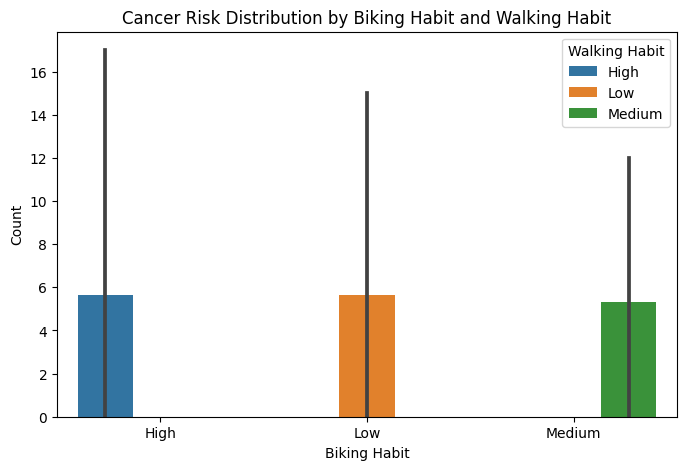

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Biking Habit', y='Count', hue='Walking Habit', data=Cancer_by_Biking_and_Walking)

plt.xlabel('Biking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Biking Habit and Walking Habit')
plt.legend(title='Walking Habit')
plt.show()

## Distribution of Cancer by Biking and Jogging

In [56]:
Cancer_by_Biking_and_Jogging = df.groupby(['Biking Habit', 'Jogging Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [57]:
Cancer_by_Biking_and_Jogging

,Biking Habit,Jogging Habit,Cancer Risk Category,Count
0,High,High,Low,17
1,High,High,Medium,0
2,High,High,High,0
3,High,Low,Low,0
4,High,Low,Medium,0
5,High,Low,High,0
6,High,Medium,Low,0
7,High,Medium,Medium,0
8,High,Medium,High,0
9,Low,High,Low,0


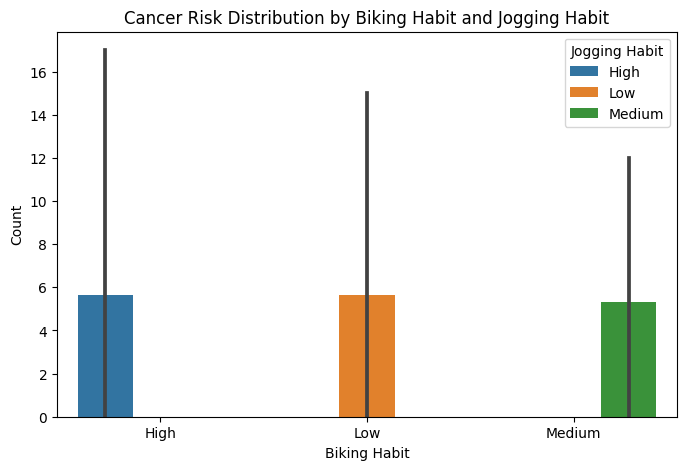

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Biking Habit', y='Count', hue='Jogging Habit', data=Cancer_by_Biking_and_Jogging)

plt.xlabel('Biking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Biking Habit and Jogging Habit')
plt.legend(title='Jogging Habit')
plt.show()

## Distribution of Cancer by Walking and Jogging

In [59]:
Cancer_by_Walking_and_Jogging = df.groupby(['Walking Habit', 'Jogging Habit', 'Cancer Risk Category']).size().reset_index(name='Count')

In [60]:
Cancer_by_Walking_and_Jogging

,Walking Habit,Jogging Habit,Cancer Risk Category,Count
0,High,High,Low,17
1,High,High,Medium,0
2,High,High,High,0
3,High,Low,Low,0
4,High,Low,Medium,0
5,High,Low,High,0
6,High,Medium,Low,0
7,High,Medium,Medium,0
8,High,Medium,High,0
9,Low,High,Low,0


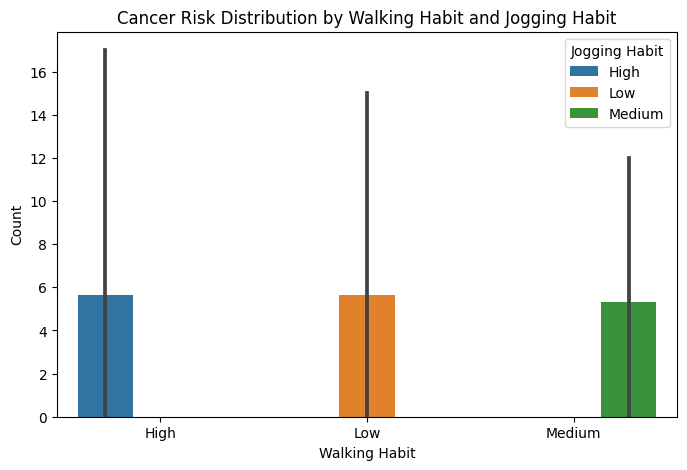

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Walking Habit', y='Count', hue='Jogging Habit', data=Cancer_by_Walking_and_Jogging)

plt.xlabel('Walking Habit')
plt.ylabel('Count')
plt.title('Cancer Risk Distribution by Walking Habit and Jogging Habit')
plt.legend(title='Jogging Habit')
plt.show()

# ThankYou